# **Install and Import Library**

In [2]:
!pip3 install Sastrawi

In [3]:
import nltk
import re
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from scipy import stats
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [4]:
# Download resource nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# inisialisasi tqdm untuk melihat progress
tqdm.pandas()

# **Load Dataset**

In [90]:
df_news_data = pd.read_csv("C:/Users/User/Jupyter Notebook/PBA/Bahan Kelompok/Scrapping News Text/kompas_news_bpjs_text_20240923.csv", encoding='latin1')
df_news_data

,Judul,Tag,Link,Text,Date,Portal Berita
0,"Tak Mampu Bayar Iuran, Bisakah Menonaktifkan B...","BPJS Kesehatan, BPJS Kesehatan PBI, bpjs keseh...",https://www.kompas.com/tren/read/2024/09/03/08...,\nKOMPAS.com - Peserta program Jaminan Kesehat...,"03/09/2024, 08:30 WIB",Kompas
1,Cara Pindah Faskes BPJS Kesehatan Online,"Cara Pindah Faskes BPJS Kesehatan Online, Cara...",https://nasional.kompas.com/read/2024/07/13/05...,\n\nKOMPAS.com - Memindahkan fasilitas kesehat...,"13/07/2024, 05:00 WIB",Kompas
2,Dirut BPJS: Dokter Asing Boleh Layani Pasien B...,"dokter asing, BPJS Kesehatan, pasien BPJS",https://nasional.kompas.com/read/2024/05/27/16...,"\n\nJAKARTA, KOMPAS.com - Direktur Utama BPJS ...","27/05/2024, 16:46 WIB",Kompas
3,"Sejahterakan Pekerja, BPJS Ketenagakerjaan Kuc...","pekerja, BPJS Ketenagakerjaan, rumah, MLT BPJS...",https://kilasbadannegara.kompas.com/bpjs-keten...,\n\nKOMPAS.com - Direktur Pelayanan Badan Pen...,"16/12/2023, 19:15 WIB",Kompas
4,"Tingkatkan Kualitas Layanan Faskes, BPJS Keseh...","kesehatan, BPJS Kesehatan, BPJS, layanan, faskes",https://kilasbadannegara.kompas.com/bpjs-keseh...,\nKOMPAS.com  Deputi Direksi Bidang Jaminan ...,"16/12/2020, 17:26 WIB",Kompas
...,...,...,...,...,...,...
89,Syarat dan Cara Berobat di Luar Kota Pakai BPJ...,"BPJS Kesehatan, Lebaran 2024, syarat berobat d...",https://www.kompas.com/tren/read/2024/04/03/20...,\n\nKOMPAS.com - Peserta BPJS Kesehatan tetap ...,"03/04/2024, 20:00 WIB",Kompas
90,BPJS Kesehatan Jadi Syarat Membuat dan Memperp...,"Surat Izin Mengemudi (SIM), BPJS Kesehatan, sy...",https://www.kompas.com/tren/read/2024/06/04/10...,\n\nKOMPAS.com - Kepesertaan BPJS Kesehatan me...,"04/06/2024, 10:00 WIB",Kompas
91,4 Jenis Kecelakaan yang Tidak Ditanggung BPJS ...,"BPJS Kesehatan, jenis kecelakaan yang tidak di...",https://www.kompas.com/tren/read/2024/03/01/09...,\n\nKOMPAS.com - Peserta yang status Jaminan K...,"01/03/2024, 09:00 WIB",Kompas
92,BPJS Ketenagakerjaan dan Pemprov Jabar Hadirka...,"Ridwan Kamil, BPJS Ketenagakerjaan, Jabar",https://nasional.kompas.com/read/2023/07/19/20...,\n\nKOMPAS.com - BPJS Ketenagakerjaan berkolab...,"19/07/2023, 20:04 WIB",Kompas


In [91]:
df_news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Judul          94 non-null     object
 1   Tag            94 non-null     object
 2   Link           94 non-null     object
 3   Text           94 non-null     object
 4   Date           94 non-null     object
 5   Portal Berita  94 non-null     object
dtypes: object(6)
memory usage: 4.5+ KB


In [126]:
df_news_text = pd.read_csv("C:/Users/User/Jupyter Notebook/PBA/Bahan Kelompok/Scrapping News Text/kompas_news_bpjs_text_20240923.csv", encoding='latin1')
df_news_text

,Judul,Tag,Link,Text,Date,Portal Berita
0,"Tak Mampu Bayar Iuran, Bisakah Menonaktifkan B...","BPJS Kesehatan, BPJS Kesehatan PBI, bpjs keseh...",https://www.kompas.com/tren/read/2024/09/03/08...,\nKOMPAS.com - Peserta program Jaminan Kesehat...,"03/09/2024, 08:30 WIB",Kompas
1,Cara Pindah Faskes BPJS Kesehatan Online,"Cara Pindah Faskes BPJS Kesehatan Online, Cara...",https://nasional.kompas.com/read/2024/07/13/05...,\n\nKOMPAS.com - Memindahkan fasilitas kesehat...,"13/07/2024, 05:00 WIB",Kompas
2,Dirut BPJS: Dokter Asing Boleh Layani Pasien B...,"dokter asing, BPJS Kesehatan, pasien BPJS",https://nasional.kompas.com/read/2024/05/27/16...,"\n\nJAKARTA, KOMPAS.com - Direktur Utama BPJS ...","27/05/2024, 16:46 WIB",Kompas
3,"Sejahterakan Pekerja, BPJS Ketenagakerjaan Kuc...","pekerja, BPJS Ketenagakerjaan, rumah, MLT BPJS...",https://kilasbadannegara.kompas.com/bpjs-keten...,\n\nKOMPAS.com - Direktur Pelayanan Badan Pen...,"16/12/2023, 19:15 WIB",Kompas
4,"Tingkatkan Kualitas Layanan Faskes, BPJS Keseh...","kesehatan, BPJS Kesehatan, BPJS, layanan, faskes",https://kilasbadannegara.kompas.com/bpjs-keseh...,\nKOMPAS.com  Deputi Direksi Bidang Jaminan ...,"16/12/2020, 17:26 WIB",Kompas
...,...,...,...,...,...,...
89,Syarat dan Cara Berobat di Luar Kota Pakai BPJ...,"BPJS Kesehatan, Lebaran 2024, syarat berobat d...",https://www.kompas.com/tren/read/2024/04/03/20...,\n\nKOMPAS.com - Peserta BPJS Kesehatan tetap ...,"03/04/2024, 20:00 WIB",Kompas
90,BPJS Kesehatan Jadi Syarat Membuat dan Memperp...,"Surat Izin Mengemudi (SIM), BPJS Kesehatan, sy...",https://www.kompas.com/tren/read/2024/06/04/10...,\n\nKOMPAS.com - Kepesertaan BPJS Kesehatan me...,"04/06/2024, 10:00 WIB",Kompas
91,4 Jenis Kecelakaan yang Tidak Ditanggung BPJS ...,"BPJS Kesehatan, jenis kecelakaan yang tidak di...",https://www.kompas.com/tren/read/2024/03/01/09...,\n\nKOMPAS.com - Peserta yang status Jaminan K...,"01/03/2024, 09:00 WIB",Kompas
92,BPJS Ketenagakerjaan dan Pemprov Jabar Hadirka...,"Ridwan Kamil, BPJS Ketenagakerjaan, Jabar",https://nasional.kompas.com/read/2023/07/19/20...,\n\nKOMPAS.com - BPJS Ketenagakerjaan berkolab...,"19/07/2023, 20:04 WIB",Kompas


# Bagian Bawah

In [122]:
# Membaca data dari file CSV
df_news_text = pd.read_csv("C:/Users/User/Jupyter Notebook/PBA/Bahan Kelompok/Scrapping News Text/kompas_news_bpjs_text_20240923.csv", encoding='latin1')

# Menambahkan kolom hasil pemrosesan ke DataFrame
# Misalnya, jika Anda sudah memiliki fungsi atau metode untuk menghasilkan kolom-kolom ini, pastikan untuk menerapkannya di sini
df_news_text['n_words'] = df_news_text['Text'].apply(word_count)
df_news_text['clean'] = df_news_text['Text'].apply(cleaning_text)
df_news_text['n_clean'] = df_news_text['clean'].apply(word_count)
df_news_text['no_stopwords'] = df_news_text['clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
df_news_text['n_no_stopwords'] = df_news_text['no_stopwords'].apply(word_count)
df_news_text['stem'] = df_news_text['no_stopwords'].apply(stemmer.stem)
df_news_text['tokens'] = df_news_text['stem'].apply(word_tokenize)

# Menampilkan DataFrame dengan kolom baru
print(df_news_text.loc[:, ["Judul", "Tag", "Link", "Date", "Portal Berita", "Text", "n_words", "clean", "n_clean", "no_stopwords", "n_no_stopwords", "stem", "tokens"]])

                                                Judul  \
0   Tak Mampu Bayar Iuran, Bisakah Menonaktifkan B...   
1            Cara Pindah Faskes BPJS Kesehatan Online   
2   Dirut BPJS: Dokter Asing Boleh Layani Pasien B...   
3   Sejahterakan Pekerja, BPJS Ketenagakerjaan Kuc...   
4   Tingkatkan Kualitas Layanan Faskes, BPJS Keseh...   
..                                                ...   
89  Syarat dan Cara Berobat di Luar Kota Pakai BPJ...   
90  BPJS Kesehatan Jadi Syarat Membuat dan Memperp...   
91  4 Jenis Kecelakaan yang Tidak Ditanggung BPJS ...   
92  BPJS Ketenagakerjaan dan Pemprov Jabar Hadirka...   
93  Tapera Tak Jamin Beri Rumah, Tak Bisa Disamaka...   

                                                  Tag  \
0   BPJS Kesehatan, BPJS Kesehatan PBI, bpjs keseh...   
1   Cara Pindah Faskes BPJS Kesehatan Online, Cara...   
2           dokter asing, BPJS Kesehatan, pasien BPJS   
3   pekerja, BPJS Ketenagakerjaan, rumah, MLT BPJS...   
4    kesehatan, BPJS Kesehatan

In [123]:
df_news_text

,Judul,Tag,Link,Text,Date,Portal Berita,n_words,clean,n_clean,no_stopwords,n_no_stopwords,stem,tokens
0,"Tak Mampu Bayar Iuran, Bisakah Menonaktifkan B...","BPJS Kesehatan, BPJS Kesehatan PBI, bpjs keseh...",https://www.kompas.com/tren/read/2024/09/03/08...,\nKOMPAS.com - Peserta program Jaminan Kesehat...,"03/09/2024, 08:30 WIB",Kompas,603,Peserta program Jaminan Kesehatan Nasional JKN...,588,Peserta program Jaminan Kesehatan Nasional JKN...,394,serta program jamin sehat nasional jkn bayar i...,"[serta, program, jamin, sehat, nasional, jkn, ..."
1,Cara Pindah Faskes BPJS Kesehatan Online,"Cara Pindah Faskes BPJS Kesehatan Online, Cara...",https://nasional.kompas.com/read/2024/07/13/05...,\n\nKOMPAS.com - Memindahkan fasilitas kesehat...,"13/07/2024, 05:00 WIB",Kompas,293,Memindahkan fasilitas kesehatan faskes pertama...,282,Memindahkan fasilitas kesehatan faskes Badan P...,196,pindah fasilitas sehat faskes badan selenggara...,"[pindah, fasilitas, sehat, faskes, badan, sele..."
2,Dirut BPJS: Dokter Asing Boleh Layani Pasien B...,"dokter asing, BPJS Kesehatan, pasien BPJS",https://nasional.kompas.com/read/2024/05/27/16...,"\n\nJAKARTA, KOMPAS.com - Direktur Utama BPJS ...","27/05/2024, 16:46 WIB",Kompas,548,JAKARTA Direktur Utama BPJS Kesehatan Ali Ghuf...,531,JAKARTA Direktur Utama BPJS Kesehatan Ali Ghuf...,320,jakarta direktur utama bpjs sehat ali ghufron ...,"[jakarta, direktur, utama, bpjs, sehat, ali, g..."
3,"Sejahterakan Pekerja, BPJS Ketenagakerjaan Kuc...","pekerja, BPJS Ketenagakerjaan, rumah, MLT BPJS...",https://kilasbadannegara.kompas.com/bpjs-keten...,\n\nKOMPAS.com - Direktur Pelayanan Badan Pen...,"16/12/2023, 19:15 WIB",Kompas,570,Direktur Pelayanan Badan Penyelenggaraan Jamin...,549,Direktur Pelayanan Badan Penyelenggaraan Jamin...,339,direktur layan badan selenggara jamin sosial b...,"[direktur, layan, badan, selenggara, jamin, so..."
4,"Tingkatkan Kualitas Layanan Faskes, BPJS Keseh...","kesehatan, BPJS Kesehatan, BPJS, layanan, faskes",https://kilasbadannegara.kompas.com/bpjs-keseh...,\nKOMPAS.com  Deputi Direksi Bidang Jaminan ...,"16/12/2020, 17:26 WIB",Kompas,736,Deputi Direksi Bidang Jaminan Pembiayaan Pelay...,710,Deputi Direksi Bidang Jaminan Pembiayaan Pelay...,482,deputi direksi bidang jamin biaya layan primer...,"[deputi, direksi, bidang, jamin, biaya, layan,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Syarat dan Cara Berobat di Luar Kota Pakai BPJ...,"BPJS Kesehatan, Lebaran 2024, syarat berobat d...",https://www.kompas.com/tren/read/2024/04/03/20...,\n\nKOMPAS.com - Peserta BPJS Kesehatan tetap ...,"03/04/2024, 20:00 WIB",Kompas,456,Peserta BPJS Kesehatan tetap bisa mendapat lay...,431,Peserta BPJS Kesehatan layanan kesehatan mudik...,290,serta bpjs sehat layan sehat mudik lebaran apr...,"[serta, bpjs, sehat, layan, sehat, mudik, leba..."
90,BPJS Kesehatan Jadi Syarat Membuat dan Memperp...,"Surat Izin Mengemudi (SIM), BPJS Kesehatan, sy...",https://www.kompas.com/tren/read/2024/06/04/10...,\n\nKOMPAS.com - Kepesertaan BPJS Kesehatan me...,"04/06/2024, 10:00 WIB",Kompas,621,Kepesertaan BPJS Kesehatan menjadi syarat keti...,588,Kepesertaan BPJS Kesehatan syarat pembuatan pe...,395,serta bpjs sehat syarat buat panjang surat izi...,"[serta, bpjs, sehat, syarat, buat, panjang, su..."
91,4 Jenis Kecelakaan yang Tidak Ditanggung BPJS ...,"BPJS Kesehatan, jenis kecelakaan yang tidak di...",https://www.kompas.com/tren/read/2024/03/01/09...,\n\nKOMPAS.com - Peserta yang status Jaminan K...,"01/03/2024, 09:00 WIB",Kompas,509,Peserta yang status Jaminan Kesehatan Nasional...,488,Peserta status Jaminan Kesehatan Nasional JKN ...,335,serta status jamin sehat nasional jkn milik ak...,"[serta, status, jamin, sehat, nasional, jkn, m..."
92,BPJS Ketenagakerjaan dan Pemprov Jabar Hadirka...,"Ridwan Kamil, BPJS Ketenagakerjaan, Jabar",https://nasional.kompas.com/read/2023/07/19/20...,\n\nKOMPAS.com - BPJS Ketenagakerjaan berkolab...,"19/07/2023, 20:04 WIB",Kompas,665,BPJS Ketenagakerjaan berkol

In [125]:
# Menyimpan DataFrame yang sudah diperbarui ke dalam file CSV dan Excel
df_news_text.to_csv("news_kompas_text_preprocessing.csv", index=False)
df_news_text.to_excel("news_kompas_text_preprocessing.xlsx", index=False)

In [93]:
# Function untuk menghitung jumlah kata di dalam teks
def word_count(text: str) -> int:
  return len(text.split())

In [121]:
# Ambil teks nya saja ke DataFrame baru, dan buat kolom baru 'n_words' untuk menampung jumlah kata
df_news_text = df_news_data[['Text']].copy()
df_news_text['n_words'] = df_news_text['Text'].apply(word_count)
df_news_text.head()

,Text,n_words
0,\nKOMPAS.com - Peserta program Jaminan Kesehat...,603
1,\n\nKOMPAS.com - Memindahkan fasilitas kesehat...,293
2,"\n\nJAKARTA, KOMPAS.com - Direktur Utama BPJS ...",548
3,\n\nKOMPAS.com - Direktur Pelayanan Badan Pen...,570
4,\nKOMPAS.com  Deputi Direksi Bidang Jaminan ...,736


# **Preprocessing**

## **Remove Outliers (Short) Text**

Hapus teks yang isinya terlalu sedikit (karena hasil scrap tidak sempurna)

In [95]:
def remove_outliers(df, column, non_outlier_rule='-3 < z < 3', reset_index=True):
  df_mean = df[column].mean()
  df_std = df[column].std()

  df['z_score'] = stats.zscore(df[column])
  df['outlier'] = df['z_score'].apply(lambda z: False if eval(non_outlier_rule) else True)

  print(df['outlier'].value_counts())

  outliers = df.loc[df['outlier'] == True].drop(columns=['outlier', 'z_score'])
  if reset_index:
    no_outliers = df.loc[df['outlier'] == False].drop(columns=['outlier', 'z_score']).reset_index(drop=True)
  else:
    no_outliers = df.loc[df['outlier'] == False].drop(columns=['outlier', 'z_score'])

  return no_outliers, outliers

In [96]:
df_news_text, outliers = remove_outliers(df_news_text, 'n_words', 'z > -1', True)

outlier
False    82
True     12
Name: count, dtype: int64


In [97]:
outliers.sort_values(by=['n_words'], ascending=False).head(10)

,Text,n_words
14,"\n JAKARTA, KOMPAS.com - Deputi I Kementerian ...",322
87,\nKOMPAS.com - Sri Rahayu (39) dengan tegas m...,308
23,"\nJAKARTA, KOMPAS.com - Tim Pemenangan Nasiona...",298
43,"\nJAKARTA, KOMPAS.com  Pengusutan dugaan tin...",298
53,"\nJAKARTA, KOMPAS.com  Pengusutan dugaan tin...",298
1,\n\nKOMPAS.com - Memindahkan fasilitas kesehat...,293
35,"\nKOMPAS.com  Di penghujung tahun 2020, BPJ...",293
45,"\nKOMPAS.com  Di penghujung tahun 2020, BPJ...",293
79,"\n\nJAKARTA, KOMPAS.com - Komisi Pemilihan Umu...",278
85,"\nJAKARTA, KOMPAS.com - Menteri Agama (Menag) ...",246


In [98]:
df_news_text

,Text,n_words
0,\nKOMPAS.com - Peserta program Jaminan Kesehat...,603
1,"\n\nJAKARTA, KOMPAS.com - Direktur Utama BPJS ...",548
2,\n\nKOMPAS.com - Direktur Pelayanan Badan Pen...,570
3,\nKOMPAS.com  Deputi Direksi Bidang Jaminan ...,736
4,"\n\nKOMPAS.com  ""Waktu dan kesehatan adalah ...",997
...,...,...
77,\n\nKOMPAS.com - Peserta BPJS Kesehatan tetap ...,456
78,\n\nKOMPAS.com - Kepesertaan BPJS Kesehatan me...,621
79,\n\nKOMPAS.com - Peserta yang status Jaminan K...,509
80,\n\nKOMPAS.com - BPJS Ketenagakerjaan berkolab...,665


## **Make Lowercase**

In [99]:
# Buat semua teks menjadi format lowercase
df_news_text['Text'] = df_news_text['Text'].apply(str.lower)
df_news_text.head(5)

,Text,n_words
0,\nkompas.com - peserta program jaminan kesehat...,603
1,"\n\njakarta, kompas.com - direktur utama bpjs ...",548
2,\n\nkompas.com - direktur pelayanan badan pen...,570
3,\nkompas.com  deputi direksi bidang jaminan ...,736
4,"\n\nkompas.com  ""waktu dan kesehatan adalah ...",997


## **Filtering by Keywords**

In [100]:
def filtering_by_keywords(df, column, keywords):
  """Buat keyword urut dari yang akan dipertahankan, baru kemudian keyword yang akan dihapus"""
  for key in keywords:
    # Hapus teks yang mengandung keyword dengan tanda (-)
    if key[0] == '-':
      pattern = f".*{key[1:]}.*"
      df[key] = df[column].str.findall(pattern).apply(lambda x: True if len(x) != 0 else False)
      df = df.loc[df[key] == False].reset_index(drop=True).drop(columns=[key])
    # Pertahankan teks yang tidak mengandung keyword dengan tanda (-)
    else:
      pattern = f".*{key}.*"
      df[key] = df[column].str.findall(pattern).apply(lambda x: True if len(x) != 0 else False)
      df = df.loc[df[key] == True].reset_index(drop=True).drop(columns=[key])
  return df

In [101]:
# Hanya mengambil teks yang mengandung kata halal, tanpa bihalal, bi halal, logo, dll.
#keywords = ['halal', '-bihalal', '-bi halal', '-logo']
#df_news_text = filtering_by_keywords(df_news_text, 'text', keywords)

In [102]:
df_news_text

,Text,n_words
0,\nkompas.com - peserta program jaminan kesehat...,603
1,"\n\njakarta, kompas.com - direktur utama bpjs ...",548
2,\n\nkompas.com - direktur pelayanan badan pen...,570
3,\nkompas.com  deputi direksi bidang jaminan ...,736
4,"\n\nkompas.com  ""waktu dan kesehatan adalah ...",997
...,...,...
77,\n\nkompas.com - peserta bpjs kesehatan tetap ...,456
78,\n\nkompas.com - kepesertaan bpjs kesehatan me...,621
79,\n\nkompas.com - peserta yang status jaminan k...,509
80,\n\nkompas.com - bpjs ketenagakerjaan berkolab...,665


## **Cleaning Text**

In [103]:
def cleaning_text(text):
  # Menambah spasi setelah koma pada koma yang tidak diberi spasi
  text = re.sub(r",(?!\s)", ", ", text)
  # Menghapus tab, new line, back slice, dll
  text = text.replace('\\t', " ").replace('\\n', " ").replace('\\u', " ").replace('\\', "")
  # Menghapus karakter non ASCII (emoticon, chinese word, dll),
  text = text.encode('ascii', 'replace').decode('ascii')
  # Menghapus URL
  text = re.sub(r"(?i)(?:https?:\/\/)?(?:www\.)?(?:[a-zA-Z0-9-.]+)(?:\.[a-zA-Z]{2,6})(?:\/[^\s\r\n]*)?", "", text)
  # Menghapus angka
  text = re.sub(r"\d+", "", text)
  # Menghapus tanda baca
  text = text.translate(str.maketrans("", "", string.punctuation))
  # Menghapus whitespace di depan/belakang teks dan double++ spasi
  text = text.strip()
  text = re.sub('\s+', ' ', text)
  # Menghapus single character
  return re.sub(r"\b[a-zA-Z]\b", "", text)

In [104]:
df_news_text['clean'] = df_news_text['Text'].apply(cleaning_text)

In [105]:
# Hitung jumlah kata setelah pembersihan
df_news_text['n_clean'] = df_news_text['clean'].apply(word_count)
df_news_text.head()

,Text,n_words,clean,n_clean
0,\nkompas.com - peserta program jaminan kesehat...,603,peserta program jaminan kesehatan nasional jkn...,588
1,"\n\njakarta, kompas.com - direktur utama bpjs ...",548,jakarta direktur utama bpjs kesehatan ali ghuf...,531
2,\n\nkompas.com - direktur pelayanan badan pen...,570,direktur pelayanan badan penyelenggaraan jamin...,549
3,\nkompas.com  deputi direksi bidang jaminan ...,736,deputi direksi bidang jaminan pembiayaan pelay...,710
4,"\n\nkompas.com  ""waktu dan kesehatan adalah ...",997,waktu dan kesehatan adalah dua aset berharga y...,966


## **Remove Stopwords**

In [106]:
# Dapatkan stopwords Indonesia dari nltk
stop = stopwords.words('indonesian')
print(f"Total ada {len(stop)} kata yang terdaftar sebagai stopwords Indonesia di nltk")
print(f"Contohnya adalah: {stop[:10]}")

Total ada 758 kata yang terdaftar sebagai stopwords Indonesia di nltk
Contohnya adalah: ['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir']


In [107]:
# Hapus stopwords dari teks berita
df_news_text['no_stopwords'] = df_news_text['clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [108]:
# Hitung jumlah kata setelah penghapusan stopwords
df_news_text['n_no_stopwords'] = df_news_text['no_stopwords'].apply(word_count)
df_news_text.head()

,Text,n_words,clean,n_clean,no_stopwords,n_no_stopwords
0,\nkompas.com - peserta program jaminan kesehat...,603,peserta program jaminan kesehatan nasional jkn...,588,peserta program jaminan kesehatan nasional jkn...,363
1,"\n\njakarta, kompas.com - direktur utama bpjs ...",548,jakarta direktur utama bpjs kesehatan ali ghuf...,531,jakarta direktur utama bpjs kesehatan ali ghuf...,295
2,\n\nkompas.com - direktur pelayanan badan pen...,570,direktur pelayanan badan penyelenggaraan jamin...,549,direktur pelayanan badan penyelenggaraan jamin...,319
3,\nkompas.com  deputi direksi bidang jaminan ...,736,deputi direksi bidang jaminan pembiayaan pelay...,710,deputi direksi bidang jaminan pembiayaan pelay...,440
4,"\n\nkompas.com  ""waktu dan kesehatan adalah ...",997,waktu dan kesehatan adalah dua aset berharga y...,966,kesehatan aset berharga dikenali dihargai hila...,544


## **Stemming**

In [109]:
# Membuat object stemmer dari library Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [110]:
# Lakukan stemming untuk menghapus imbuhan dari setiap kata
df_news_text['stem'] = df_news_text['no_stopwords'].progress_apply(stemmer.stem)

100%|██████████████████████████████████████████████████████████████████████████████████| 82/82 [06:11<00:00,  4.54s/it]


In [115]:
df_news_text.head()

,Text,n_words,clean,n_clean,no_stopwords,n_no_stopwords,stem
0,\nkompas.com - peserta program jaminan kesehat...,603,peserta program jaminan kesehatan nasional jkn...,588,peserta program jaminan kesehatan nasional jkn...,363,serta program jamin sehat nasional jkn bayar i...
1,"\n\njakarta, kompas.com - direktur utama bpjs ...",548,jakarta direktur utama bpjs kesehatan ali ghuf...,531,jakarta direktur utama bpjs kesehatan ali ghuf...,295,jakarta direktur utama bpjs sehat ali ghufron ...
2,\n\nkompas.com - direktur pelayanan badan pen...,570,direktur pelayanan badan penyelenggaraan jamin...,549,direktur pelayanan badan penyelenggaraan jamin...,319,direktur layan badan selenggara jamin sosial b...
3,\nkompas.com  deputi direksi bidang jaminan ...,736,deputi direksi bidang jaminan pembiayaan pelay...,710,deputi direksi bidang jaminan pembiayaan pelay...,440,deputi direksi bidang jamin biaya layan primer...
4,"\n\nkompas.com  ""waktu dan kesehatan adalah ...",997,waktu dan kesehatan adalah dua aset berharga y...,966,kesehatan aset berharga dikenali dihargai hila...,544,sehat aset harga nali harga hilang den waitley...


## **Frequency Words**

In [112]:
# Mendapatkan nilai freq words dalam DataFrame
def freq_words(df_column):
  all_words = ' '.join([text for text in df_column])
  all_words = all_words.split()
  fdist = FreqDist(all_words)
  return pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

In [113]:
# Plotting bar chart untuk <n> kata paling sering muncul
def bar_freq_words(df, column, n = 30):
  d = df.nlargest(columns=column, n = n)
  plt.figure(figsize=(50,10))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

In [114]:
# Dapatkan freq words hasil dari stemming, urut dari yang terbesar
df_words = freq_words(df_news_text['stem']).sort_values(by=['count'], ascending=False)
df_words.head()

,word,count
3,sehat,1492
11,bpjs,1397
0,serta,839
44,layan,686
27,kerja,387


In [84]:
# Simpan hasilnya ke dalam CSV
output_file = 'freq_words.csv'
df_words.to_csv(output_file, index=False, sep=";")

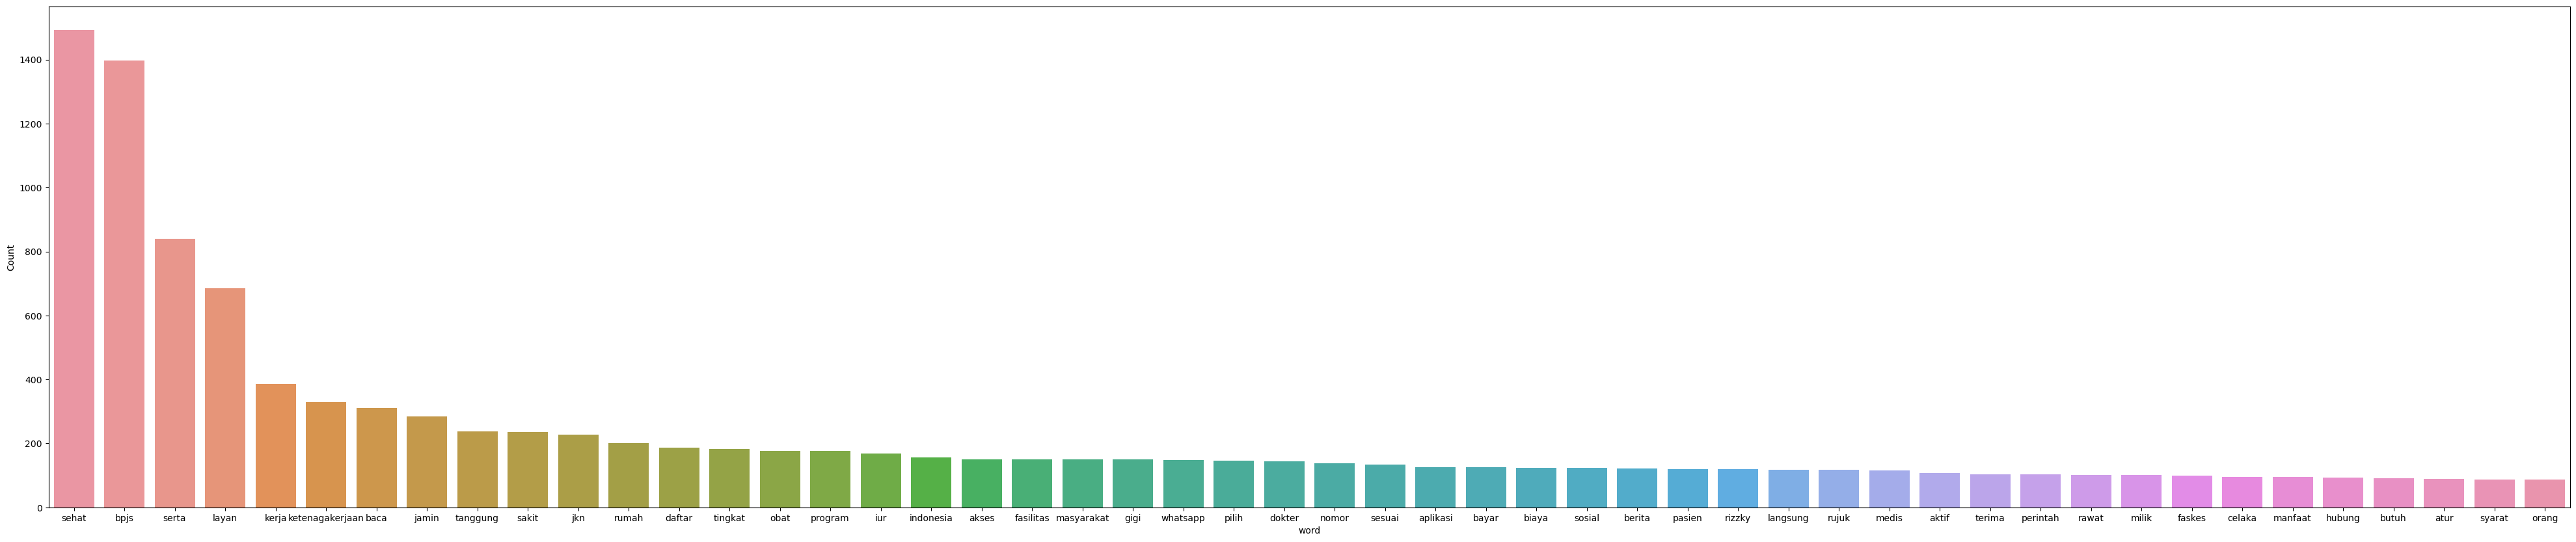

In [85]:
# Buat bar chart untuk freq words
bar_freq_words(df_words, 'count', 50)

## **Tokenization**

In [86]:
# NLTK word rokenize
df_news_text['tokens'] = df_news_text['stem'].apply(word_tokenize)
df_news_text.head()

,Text,n_words,clean,n_clean,no_stopwords,n_no_stopwords,stem,tokens
0,\nkompas.com - peserta program jaminan kesehat...,603,peserta program jaminan kesehatan nasional jkn...,588,peserta program jaminan kesehatan nasional jkn...,363,serta program jamin sehat nasional jkn bayar i...,"[serta, program, jamin, sehat, nasional, jkn, ..."
1,"\n\njakarta, kompas.com - direktur utama bpjs ...",548,jakarta direktur utama bpjs kesehatan ali ghuf...,531,jakarta direktur utama bpjs kesehatan ali ghuf...,295,jakarta direktur utama bpjs sehat ali ghufron ...,"[jakarta, direktur, utama, bpjs, sehat, ali, g..."
2,\n\nkompas.com - direktur pelayanan badan pen...,570,direktur pelayanan badan penyelenggaraan jamin...,549,direktur pelayanan badan penyelenggaraan jamin...,319,direktur layan badan selenggara jamin sosial b...,"[direktur, layan, badan, selenggara, jamin, so..."
3,\nkompas.com  deputi direksi bidang jaminan ...,736,deputi direksi bidang jaminan pembiayaan pelay...,710,deputi direksi bidang jaminan pembiayaan pelay...,440,deputi direksi bidang jamin biaya layan primer...,"[deputi, direksi, bidang, jamin, biaya, layan,..."
4,"\n\nkompas.com  ""waktu dan kesehatan adalah ...",997,waktu dan kesehatan adalah dua aset berharga y...,966,kesehatan aset berharga dikenali dihargai hila...,544,sehat aset harga nali harga hilang den waitley...,"[sehat, aset, harga, nali, harga, hilang, den,..."


In [89]:
df_news_text.loc[:,["Judul", "Tag", "Link", "Date", "Portal Berita", "Text","n_words","clean", "n_clean","no_stopwords","n_no_stopwords", "stem", "tokens"]]

KeyError: "['n_words', 'clean', 'n_clean', 'no_stopwords', 'n_no_stopwords', 'stem', 'tokens'] not in index"

In [61]:
df_news_text

,Text,n_words,clean,n_clean,no_stopwords,n_no_stopwords,stem,tokens
0,\nkompas.com - peserta program jaminan kesehat...,603,peserta program jaminan kesehatan nasional jkn...,588,peserta program jaminan kesehatan nasional jkn...,363,serta program jamin sehat nasional jkn bayar i...,"[serta, program, jamin, sehat, nasional, jkn, ..."
1,"\n\njakarta, kompas.com - direktur utama bpjs ...",548,jakarta direktur utama bpjs kesehatan ali ghuf...,531,jakarta direktur utama bpjs kesehatan ali ghuf...,295,jakarta direktur utama bpjs sehat ali ghufron ...,"[jakarta, direktur, utama, bpjs, sehat, ali, g..."
2,\n\nkompas.com - direktur pelayanan badan pen...,570,direktur pelayanan badan penyelenggaraan jamin...,549,direktur pelayanan badan penyelenggaraan jamin...,319,direktur layan badan selenggara jamin sosial b...,"[direktur, layan, badan, selenggara, jamin, so..."
3,\nkompas.com  deputi direksi bidang jaminan ...,736,deputi direksi bidang jaminan pembiayaan pelay...,710,deputi direksi bidang jaminan pembiayaan pelay...,440,deputi direksi bidang jamin biaya layan primer...,"[deputi, direksi, bidang, jamin, biaya, layan,..."
4,"\n\nkompas.com  ""waktu dan kesehatan adalah ...",997,waktu dan kesehatan adalah dua aset berharga y...,966,kesehatan aset berharga dikenali dihargai hila...,544,sehat aset harga nali harga hilang den waitley...,"[sehat, aset, harga, nali, harga, hilang, den,..."
...,...,...,...,...,...,...,...,...
77,\n\nkompas.com - peserta bpjs kesehatan tetap ...,456,peserta bpjs kesehatan tetap bisa mendapat lay...,431,peserta bpjs kesehatan layanan kesehatan mudik...,270,serta bpjs sehat layan sehat mudik lebaran apr...,"[serta, bpjs, sehat, layan, sehat, mudik, leba..."
78,\n\nkompas.com - kepesertaan bpjs kesehatan me...,621,kepesertaan bpjs kesehatan menjadi syarat keti...,588,kepesertaan bpjs kesehatan syarat pembuatan pe...,372,serta bpjs sehat syarat buat panjang surat izi...,"[serta, bpjs, sehat, syarat, buat, panjang, su..."
79,\n\nkompas.com - peserta yang status jaminan k...,509,peserta yang status jaminan kesehatan nasional...,488,peserta status jaminan kesehatan nasional jkn ...,324,serta status jamin sehat nasional jkn milik ak...,"[serta, status, jamin, sehat, nasional, jkn, m..."
80,\n\nkompas.com - bpjs ketenagakerjaan berkolab...,665,bpjs ketenagakerjaan berkolaborasi dengan peme...,628,bpjs ketenagakerjaan berkolaborasi pemerintah ...,402,bpjs ketenagakerjaan kolaborasi perintah provi...,"[bpjs, ketenagakerjaan, kolaborasi, perintah, ..."


# **Save Result**

In [ ]:
# Save ke CSV
df_news_text.to_csv("news_kompas_text_preprocessing.csv")

In [ ]:
# Save ke Excel
df_news_text.to_excel("news_kompas_text_preprocessing.xlsx")